<a href="https://colab.research.google.com/github/Zaheer-10/NeuralNetHub/blob/main/OptimizeCNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Create CNN Model and Optimize it using Keras Tuner**

---

:

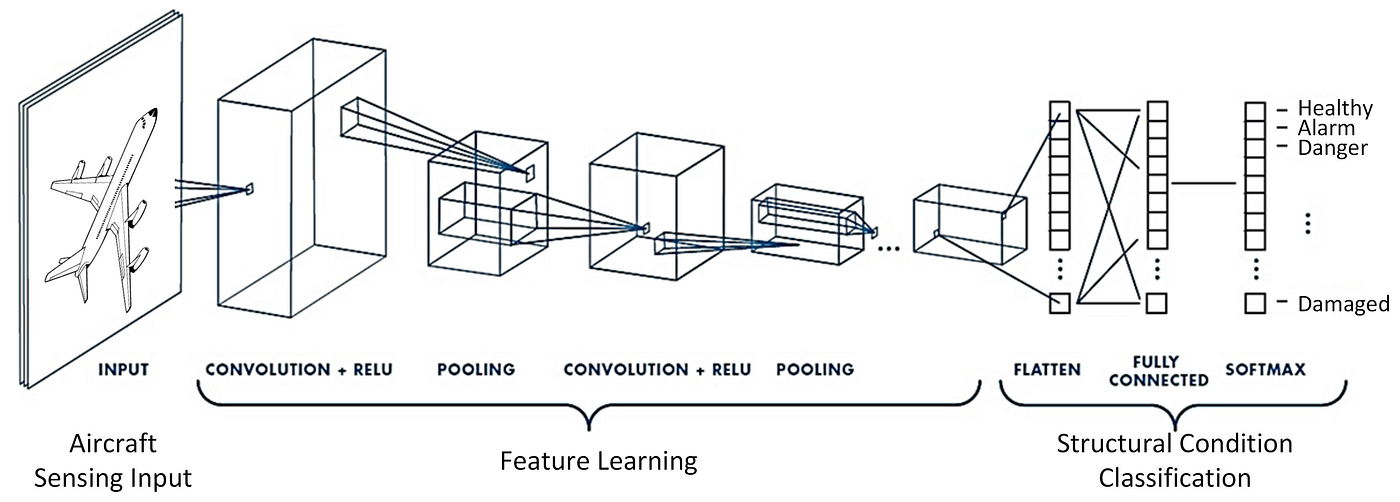

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 92kB 4.3MB/s 
     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.8MB 40.4MB/s 
     |████████████████████████████████| 450kB 61.2MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15354 sha256=7a5bfc8ee66e9148144bb3e05ae266640aa368005f00b81c778381288d9df36a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.1.0-rc1


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 15s 278us/sample - loss: 0.3919 - accuracy: 0.8587 - val_loss: 0.2863 - val_accuracy: 0.8948
Epoch 2/3
54000/54000 [==============================] - 9s 162us/sample - loss: 0.2458 - accuracy: 0.9087 - val_loss: 0.2512 - val_accuracy: 0.9087
Epoch 3/3
54000/54000 [==============================] - 9s 159us/sample - loss: 0.1847 - accuracy: 0.9316 - val_loss: 0.2424 - val_accuracy: 0.9132


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 7s 137us/sample - loss: 0.4962 - accuracy: 0.8277 - val_loss: 0.3992 - val_accuracy: 0.8530
Epoch 2/3
54000/54000 [==============================] - 7s 130us/sample - loss: 0.3681 - accuracy: 0.8658 - val_loss: 0.4182 - val_accuracy: 0.8485
Epoch 3/3
54000/54000 [==============================] - 7s 131us/sample - loss: 0.3362 - accuracy: 0.8745 - val_loss: 0.4131 - val_accuracy: 0.8585


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 8s 144us/sample - loss: 0.3862 - accuracy: 0.8594 - val_loss: 0.2880 - val_accuracy: 0.8928
Epoch 2/3
54000/54000 [==============================] - 7s 139us/sample - loss: 0.2460 - accuracy: 0.9093 - val_loss: 0.2577 - val_accuracy: 0.9063
Epoch 3/3
54000/54000 [==============================] - 8s 141us/sample - loss: 0.1881 - accuracy: 0.9292 - val_loss: 0.2454 - val_accuracy: 0.9160


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 8s 142us/sample - loss: 0.3858 - accuracy: 0.8603 - val_loss: 0.2790 - val_accuracy: 0.8973
Epoch 2/3
54000/54000 [==============================] - 7s 133us/sample - loss: 0.2435 - accuracy: 0.9105 - val_loss: 0.2561 - val_accuracy: 0.9058
Epoch 3/3
54000/54000 [==============================] - 7s 136us/sample - loss: 0.1806 - accuracy: 0.9329 - val_loss: 0.2513 - val_accuracy: 0.9103


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 7s 129us/sample - loss: 0.5079 - accuracy: 0.8219 - val_loss: 0.3854 - val_accuracy: 0.8560
Epoch 2/3
54000/54000 [==============================] - 7s 122us/sample - loss: 0.3817 - accuracy: 0.8606 - val_loss: 0.3934 - val_accuracy: 0.8622
Epoch 3/3
54000/54000 [==============================] - 6s 120us/sample - loss: 0.3489 - accuracy: 0.8712 - val_loss: 0.3438 - val_accuracy: 0.8735


INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 80)        800       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        64032     
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                1486944   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 1,552,746
Trainable params: 1,552,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Train on 54000 samples, validate on 6000 samples
Epoch 4/10
54000/54000 [==============================] - 8s 148us/sample - loss: 0.1383 - accuracy: 0.9486 - val_loss: 0.2772 - val_accuracy: 0.9073
Epoch 5/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.0999 - accuracy: 0.9637 - val_loss: 0.2729 - val_accuracy: 0.9107
Epoch 6/10
54000/54000 [==============================] - 8s 144us/sample - loss: 0.0719 - accuracy: 0.9734 - val_loss: 0.3503 - val_accuracy: 0.9120
Epoch 7/10
54000/54000 [==============================] - 7s 138us/sample - loss: 0.0520 - accuracy: 0.9811 - val_loss: 0.3996 - val_accuracy: 0.9090
Epoch 8/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.0396 - accuracy: 0.9860 - val_loss: 0.4146 - val_accuracy: 0.9103
Epoch 9/10
54000/54000 [==============================] - 8s 143us/sample - loss: 0.0336 - accuracy: 0.9881 - val_loss: 0.4527 - val_accuracy: 0.9142
Epoch 10/10
54000/54000 [==========================